# sinatra Tutorial
# Language recognition by speech

## Introduction

This notebooks' aim is to become a guide to the use of objects and
instances of sinatra, which is a project to identify language by the speech (audio).

This project is based on Python and some of their most well-known libraries as *numpy* or *matplotlib*, and it is currently developped in Linux. That's why we strongly recommend to use, at least, a virtual machine running Linux and Anaconda.

## SinatraAudio

In sinatra, audio and language are booth part of a classification quest. That's why sinatraAudio class is used. This class is defined to store:

- Audio data (1D-numpy-array)
- Language label (integer)
- Frequency (integer)
- Name (string)

It is possible to work with this data through the *getters*.

    audio = sinatraAudioInstance.getAudio();
    freq = sinatraAudioInstance.getFrequency();
    name = sinatraAudioInstance.getName();
    language = sinatraAudioInstance.getlClass();
    
It is possible that some of the operations that we perform in sinatra modify the audio contents. To modify audio, we can use the method modAudio().

    sinatraAudioInstance.modAudio(audio);
    
It is important to realise that data (audio) is stored INSIDE the object, 
so when modAudio() is called, there is not going to be any answer since the object is modifying information that got stored inside.

sinatraAudio can be created from scratch. For that, we need a numpy array that contains the audio information, and frequency, name and language class. We can use the next builder:

    sinatraAudioInstance = sinatraAudio(name, languageClass, audio, freq);

Let's take a look to an example:

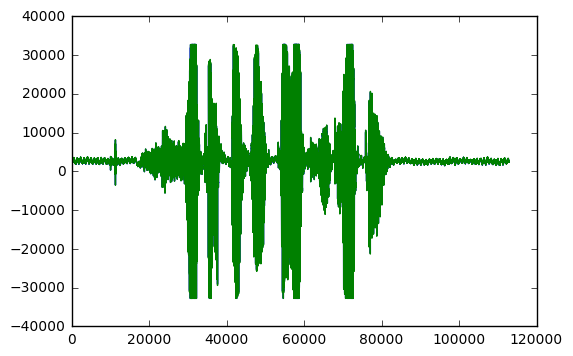

In [2]:
# Modules
import sinatraAudio as sA;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.io.wavfile import read;
%matplotlib inline
# Let's open a wavfile.
freq, audioArray = read('48.wav');
# Let's create a sinatraAudio instance
# - '48' name
# - 1 class (english, f.instance)
sinatraAudioInstance = sA.sinatraAudio('48', 1, audioArray, freq);
# Let's see if is there any data inside.
plt.plot(sinatraAudioInstance.getAudio());
plt.show()

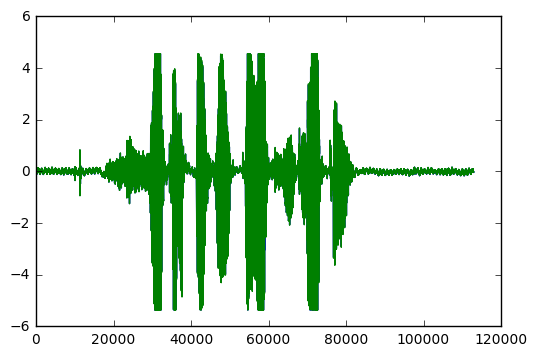

In [3]:
# cool, we have data. Now, let's modify data. For instance,
# let's normalize it

audioData = sinatraAudioInstance.getAudio();
audioData = (audioData - np.mean(audioData)) / np.std(audioData);
sinatraAudioInstance.modAudio(audioData);
plt.plot(sinatraAudioInstance.getAudio());
plt.show()

## sinatraIO

sinatraAudio can be built from raw audio data. However, our purpose is
to handle big ammounts of data for testing and validation. In a near future we'll use some advanced format to handle the data, as it could be a relational database or a semantic database. However, by now, we are using the simplest format, the "comma separeted values" format.

sinatraIO is an object that reads a .csv file which has three columns.
    
    class,file,lange
    1,b0168.wav,English
    1,b0169.wav,English
    1,b0170.wav,English
    ...

It is created through specifying the path of this .csv file. It is
important that files are located within the same folder.

    reader = sinatraIO('~/Documents/LRS/Dataset/tablaNombres.csv');
    
Once it is specified, the object is created and it knows where to gather
data from. However, it doesn't have any loaded information. For that, it
is necesary to order the method .readTable()

    reader.readTable();
    
This operation may take a few seconds or even minutes depending on the amount of files. Be careful with the size of the dataset, since this
methods haven't been optimized for big tasks.

sinatraIO is an iterator. What does it mean? Imagine when you are looping
a range(10).
    
    for iter in range(10):
        do something;
        
In this context, range(10) is an iterator, so Python knows that it has a set of values defined inside, and every time it iterates over it, it keeps one of the values within range until there is nothing inside. sinatraIO
works in a similar way.

    for sinatraAudioInstance in reader:
        do something;
        
So we can get the sinatraAudio objects from within just using a for loop. It's great, isn't it?



In [10]:
import sinatraAudio as sA;
import sinatraIO as sIO;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.io.wavfile import read;
%matplotlib inline
pathToTable = '/home/charizard/Documents/LRS/Dataset/tablaNombres.csv';
reader = sIO.sinatraIO(pathToTable);
reader.readTable();
# A way to get data from reader is just using -next-
audio =next(reader);
print("My name is {0} and I am a {1}".format(audio.getName(), audio))
for audio in reader:
    # This if will not be necesary in a near future. Meanwhile
    # just make use of it. Don't ask.
    if audio == 0:
        break;
    print("My name is {0} and I am a {1}".format(audio.getName(), audio));
        
    

reading table /home/charizard/Documents/LRS/Dataset/tablaNombres.csv
task completed
My name is b0177 and I am a sinatra - sinatraAudio
My name is b0176 and I am a sinatra - sinatraAudio
My name is b0175 and I am a sinatra - sinatraAudio
My name is b0174 and I am a sinatra - sinatraAudio
My name is b0173 and I am a sinatra - sinatraAudio
My name is b0172 and I am a sinatra - sinatraAudio
My name is b0171 and I am a sinatra - sinatraAudio
My name is b0170 and I am a sinatra - sinatraAudio
My name is b0169 and I am a sinatra - sinatraAudio
My name is b0168 and I am a sinatra - sinatraAudio
My name is aes8 and I am a sinatra - sinatraAudio
My name is aes7 and I am a sinatra - sinatraAudio
My name is aes5 and I am a sinatra - sinatraAudio
My name is aes2 and I am a sinatra - sinatraAudio
My name is aes15 and I am a sinatra - sinatraAudio
My name is aes14 and I am a sinatra - sinatraAudio
My name is aes13 and I am a sinatra - sinatraAudio
My name is aes12 and I am a sinatra - sinatraAudio
My

## sinatraFrontEnd

By now we have studied classes concerning the storing and
input of data, but not any manipulation of the data. This has place
through sinatraFrontEnd.

By now, some methods have been implemented in sinatraFrontEnd but this is still an incandescent area. Meanwhile the machine learning-methods may still be far of their first version, it's true we can already play with segmentation and normalization.

    worker = sinatraFrontEnd();
    
As you can see, sinatraFrontEnd doesn't have by now any parameter. It doesn't mean that it doesn't have information inside; this information must
be provided through the analysis of sinatraAudios. By now, we'll use it
just as a tool box.
    
    normalizedSinatraAudioInstance = worker.normalize(sinatraAudioInstance)
    matrix, testArray, nTokkens = worker.segmentate(sinatraAudioInstance)
    
The first method makes something extraeasy that you should already know.
The second method does something much more complicated... segmentate! It's
difficult to explain what are we calling segmentation in just a paragraph, but I'll try. sinatra's strategy to identify sound is based in the detection of patterns within some units of sound that are can be identified in audio files because they are located within the ensamble "minima, maxima, minima". So what we do is, first, remove noise (high frequency terms in Fourier space), secondly, we filter the signal (using a maxima-within-window filter), thirdly, we calculate numerically derivatives of first and second order, and finally, we obtain the cut-points that determine the minima-maxima-minima ensamble. Those values are by now introduced in a matrix of fixed row lenght, although this fomat may change in the short term.


The next piece of code is really helpful for those who want to improve the segmentation algorithm, since it provides a very clear picture.



reading table /home/charizard/Documents/LRS/Dataset/tablaNombres.csv
task completed
reading b0177
	removing high frequencies
	filtering
	processing first and second order derivatives
	segmentating
task completed


/home/charizard/.local/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


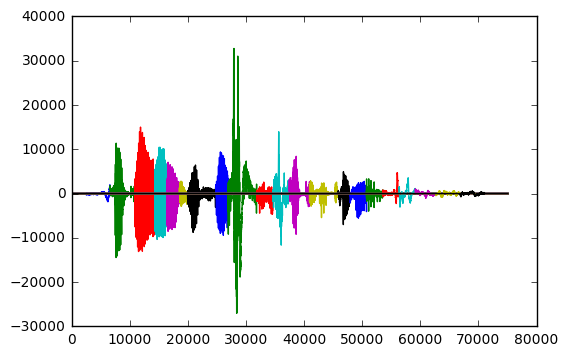

In [14]:
import sinatraAudio as sA;
import sinatraIO as sIO;
import sinatraFrontEnd as sFE;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.io.wavfile import read;
%matplotlib inline
pathToTable = '/home/charizard/Documents/LRS/Dataset/tablaNombres.csv';
reader = sIO.sinatraIO(pathToTable);
reader.readTable();
audio1 =next(reader);
x = audio1.getAudio();
feWorker = sFE.sinatraFrontEnd();
matrix, testArray, nTokkens = feWorker.segmentate(audio1);
for iter in range(len(testArray)):
    y = np.zeros(len(x));
    y[testArray[iter,0]:testArray[iter,1]] = x[testArray[iter,0]:testArray[iter,1]];
    plt.plot(y);
plt.show();
# What we are doing is segmentating and using "testArray" to plot
# the values within each tokken.


